In [259]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [260]:
df = pd.read_csv('CreditCard.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [261]:
df.isna().mean()

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [262]:
df.shape

(8950, 18)

In [263]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3,weights='distance')
df[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]] = knn.fit_transform(df[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]])

In [264]:
def custom_describe(data):
    """
    Generate a custom description of a DataFrame including basic statistics, 
    missing values count, unique values count, outliers count, and data types.

    Parameters:
    - data (pd.DataFrame): The pandas DataFrame to be described.

    Returns:
    pd.DataFrame: A custom description DataFrame with the following columns:
    - data_type: Data types for each column.
    - mean: Mean value for each numeric column.
    - std: Standard deviation for each numeric column.
    - missing_values: Count of missing values for each column.
    - unique_values: Count of unique values for each column.
    - outliers: Count of outliers for each numeric column.
    """
    # Basic statistics
    desc_stats = data.describe()

    # Missing values count
    missing_values = data.isnull().sum()

    # Unique values count
    unique_values = data.nunique()

    # Identify numeric columns
    numeric_cols = data.select_dtypes(include=['number']).columns

    # Calculate IQR and identify outliers for each numeric column
    outliers = {}
    for col in numeric_cols:
        q1 = desc_stats.loc['25%', col]
        q3 = desc_stats.loc['75%', col]
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

    # Get data types for each column
    data_types = data.dtypes
    
    # Combine all information
    custom_description = pd.DataFrame({
        'data_type': data_types,
        'mean': desc_stats.loc['mean'],
        'std': desc_stats.loc['std'],
        'missing_values': missing_values,
        'unique_values': unique_values,
        'outliers': outliers
    })
    return custom_description

In [265]:
custom_describe(df)

,data_type,mean,std,missing_values,unique_values,outliers
BALANCE,float64,1564.474828,2081.531879,0,8871,695.0
BALANCE_FREQUENCY,float64,0.877271,0.236904,0,43,1493.0
CASH_ADVANCE,float64,978.871112,2097.163877,0,4323,1030.0
CASH_ADVANCE_FREQUENCY,float64,0.135144,0.200121,0,54,525.0
CASH_ADVANCE_TRX,int64,3.248827,6.824647,0,65,804.0
CREDIT_LIMIT,float64,4494.336879,3638.627997,0,206,248.0
CUST_ID,object,NaN,NaN,0,8950,NaN
INSTALLMENTS_PURCHASES,float64,411.067645,904.338115,0,4452,867.0
MINIMUM_PAYMENTS,float64,894.927261,2364.008025,0,8689,850.0
ONEOFF_PURCHASES,float64,592.437371,1659.887917,0,4014,1013.0


In [266]:
df.drop(columns=['CUST_ID'], inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,722.305479,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [267]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = df
x = sc.fit_transform(x)

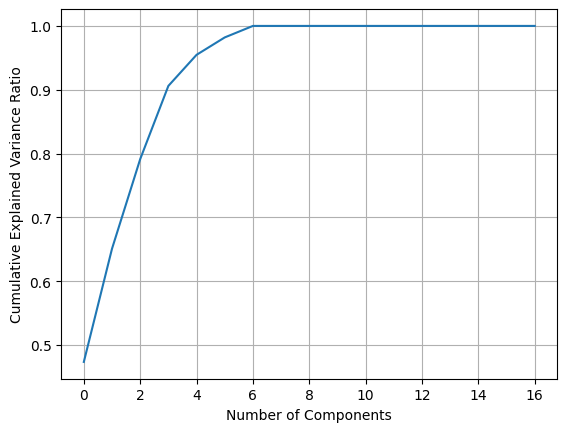

In [268]:

from sklearn.decomposition import PCA
x = df.iloc[:,:]
# Fit PCA
pca = PCA().fit(x)

# Plot cumulative explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


In [269]:
pca = PCA(n_components = 4)
x = pca.fit_transform(x)

In [270]:
x

array([[-4330.11254935,   928.0764054 ,   162.55482349,  -192.15906301],
       [ 4115.15147905, -2424.07386005,  2110.50719802, -4072.56053092],
       [ 1495.23678537, -1969.08063549, -2120.86751885,  1098.99991143],
       ...,
       [-4383.07431834,   919.16530431,    80.80924707,  -163.26880204],
       [-4794.88027527,  1038.10966039,   330.62892879,  -307.24406466],
       [-3627.24546916,  1561.55272552,   -19.9294523 ,   286.0633028 ]])

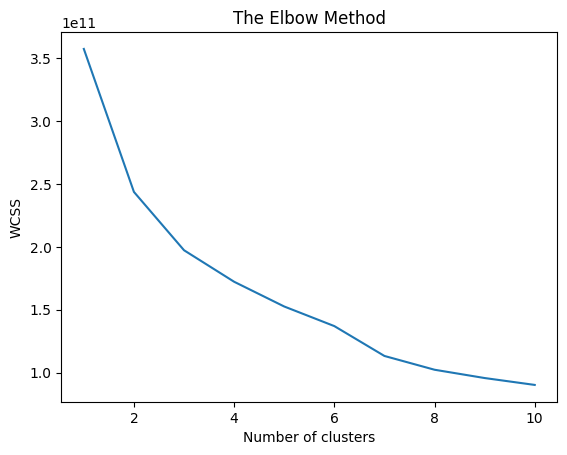

In [271]:
from sklearn.cluster import KMeans
wcss = list()
# In this we will making a curve to find with different number of cluster
for i in range(1,11):
    K_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    K_means.fit(x)
    wcss.append(K_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [272]:
## Using Agglomerative technique to find dendograms
# So taking cluster = 3

In [273]:
## So making K_Means cluster for 3
finalKmeans = KMeans(n_clusters= 3, init='k-means++',random_state=42)
y_kmeans = finalKmeans.fit_predict(x)

In [274]:
cluster_labels = finalKmeans.labels_
cluster_labels

array([1, 0, 0, ..., 1, 1, 1])

In [275]:
df['Cluster'] = pd.DataFrame(y_kmeans)

In [276]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,722.305479,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [277]:
pca = PCA(n_components = 2)
x_small = pca.fit_transform(x)

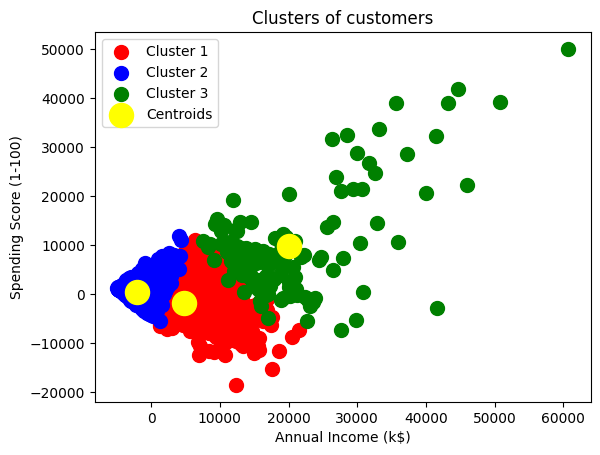

In [278]:
plt.scatter(x_small[y_kmeans == 0, 0], x_small[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_small[y_kmeans == 1, 0], x_small[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_small[y_kmeans == 2, 0], x_small[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(finalKmeans.cluster_centers_[:, 0], finalKmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()